## Scraping Reddit and posting to Pandas
inspiration for this notebook:
https://recycledrobot.co.uk/words/?web-scraping

quick tutorial: how to build a table with plotly.
https://plotly.com/python/table/

In [1]:
#!pip install lxml

In [24]:
import plotly.graph_objs as go
import requests
from bs4 import BeautifulSoup
import pandas as pd
import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [25]:
def base_fig():
    data=go.Table(columnwidth = [200,200,1000,160],
                    header=dict(values=[['<b>Ratings</b><br>(100 ratings)'],
                                        ['<b>Days Ago</b>'],
                                        ['<b>Review Comments</b>'],
                                        ['<b>Sentiment<br>Analysis</b>']
                                        ], 
                           line_color='darkslategray',
                           fill_color='royalblue',
                           align=['left','center'],
                           font=dict(color='white', size=12),
                           height=40),
                    cells=dict(values=[[1,2,3,4],
                                       [1,2,3,4],
                                       ['Waiting for data','Waiting for data','Waiting for data','Waiting for data'],
                                       ['Neutral','Neutral','Neutral','Neutral']
                                       ],
                               line_color='darkslategray',
                               fill=dict(color=['paleturquoise', 'white','paleturquoise','white']),
                               align=['left', 'center'],
                               font_size=12,
                               height=30)
              
                 )
    fig = go.Figure([data])

    fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="black",
)
    return fig

In [26]:
def error_fig():
    data=go.Table(columnwidth = [200,200,1000,160],
                    header=dict(values=[['<b>Ratings</b><br>(100 ratings)'],
                                        ['<b>Days Ago</b>'],
                                        ['<b>Review Comments</b>'],
                                        ['<b>Sentiment<br>Analysis</b>']
                                        ], 
                           line_color='darkslategray',
                           fill_color='royalblue',
                           align=['left','center'],
                           font=dict(color='white', size=12),
                           height=40),
                    cells=dict(values=[['whoa!','whoa!','whoa!','whoa!'],
                                       [4,3,2,1],
                                       ['Slow down!','Scraping takes a sec','Try back later!','Take a break'],
                                       ['Neutral','Neutral','Neutral','Neutral']
                                       ],
                               line_color='darkslategray',
                               fill=dict(color=['paleturquoise', 'white','paleturquoise','white']),
                               align=['left', 'center'],
                               font_size=12,
                               height=30)
                 )
    fig = go.Figure([data])
    return fig

In [27]:
def sentiment_scores(sentence):
    try:
    # Create a SentimentIntensityAnalyzer object.
        sid_obj = SentimentIntensityAnalyzer()
        sentiment_dict = sid_obj.polarity_scores(sentence)
        score = sentiment_dict['compound']
        if score >= 0.05 :
            final=f"Positive: {round(score,2)}"
        elif score <= - 0.05 :
            final=f"Negative: {round(score,2)}"
        else :
            final=f"Neutral: {round(score,2)}"
        return final
    except:
        return "Error"

In [28]:
# define a scraper function
def lovely_soup(url):
    r = requests.get(url, headers = {'User-agent': 'Agent_Smith'})
    return BeautifulSoup(r.text, 'html')

In [29]:
def scrape_restaurant():
    # apply the function to our reddit source
    url = 'https://restaurantguru.com/Agas-Restaurant-Houston/reviews?bylang=1'
    soup = lovely_soup(url)
    # create a list of Reviews
    reviews = soup.findAll('span', {'class': 'text_full'})
    reviewlist=[]
    for review in reviews:
        output = str(review).split('<span class="text_full">')[1]
        reviewlist.append(output)
    # create a list of Ratings
    ratings = soup.findAll('div', {'class':'o_review'})
    ratinglist=[]
    for rating in ratings:
        output = str(rating).split('data-score="')[1][0]
        ratinglist.append(output)
    # create a list of days ago
    daysagos = soup.findAll('span', {'class':'grey'})
    daysagolist=[]
    for daysago in daysagos:
        output = str(daysago).split('<span class="grey">')[1]
        daysagolist.append(output)
    daysagolist=daysagolist[8:]
    ########### Pandas work ######
    # convert the three lists into a pandas dataframe

    df_dict={'rating':ratinglist, 'days_ago':daysagolist,'review':reviewlist}
    working_df = pd.DataFrame(df_dict)

    # apply the regex function
    working_df=working_df.replace(regex=['</span>'], value=' ')

    working_df['sentiment'] = working_df['review'].apply(sentiment_scores)

    # send final df
    working_df[['rating', 'days_ago', 'review', 'sentiment']].copy()



    ########### Set up the figure ######

    data=go.Table(columnwidth = [200,200,1000,160],
                    header=dict(values=[['<b>Ratings</b><br>(100 ratings)'],
                                        ['<b>Days Ago</b>'],
                                        ['<b>Review Comments</b>'],
                                        ['<b>Sentiment<br>Analysis</b>']
                                        ], 
                           line_color='darkslategray',
                           fill_color='royalblue',
                           align=['left','center'],
                           font=dict(color='white', size=12),
                           height=40),
                    cells=dict(values=[final_df['rating'],
                                       final_df['days_ago'],
                                       final_df['review'],
                                       final_df['sentiment'].values
                                       ],
                              line_color='darkslategray',
                              fill=dict(color=['paleturquoise', 'white','paleturquoise','white']),
                              align=['left', 'center'],
                              font_size=12,
                              height=30)
              
                 )
    fig = go.Figure([data])

    fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="black",
    )
    return fig

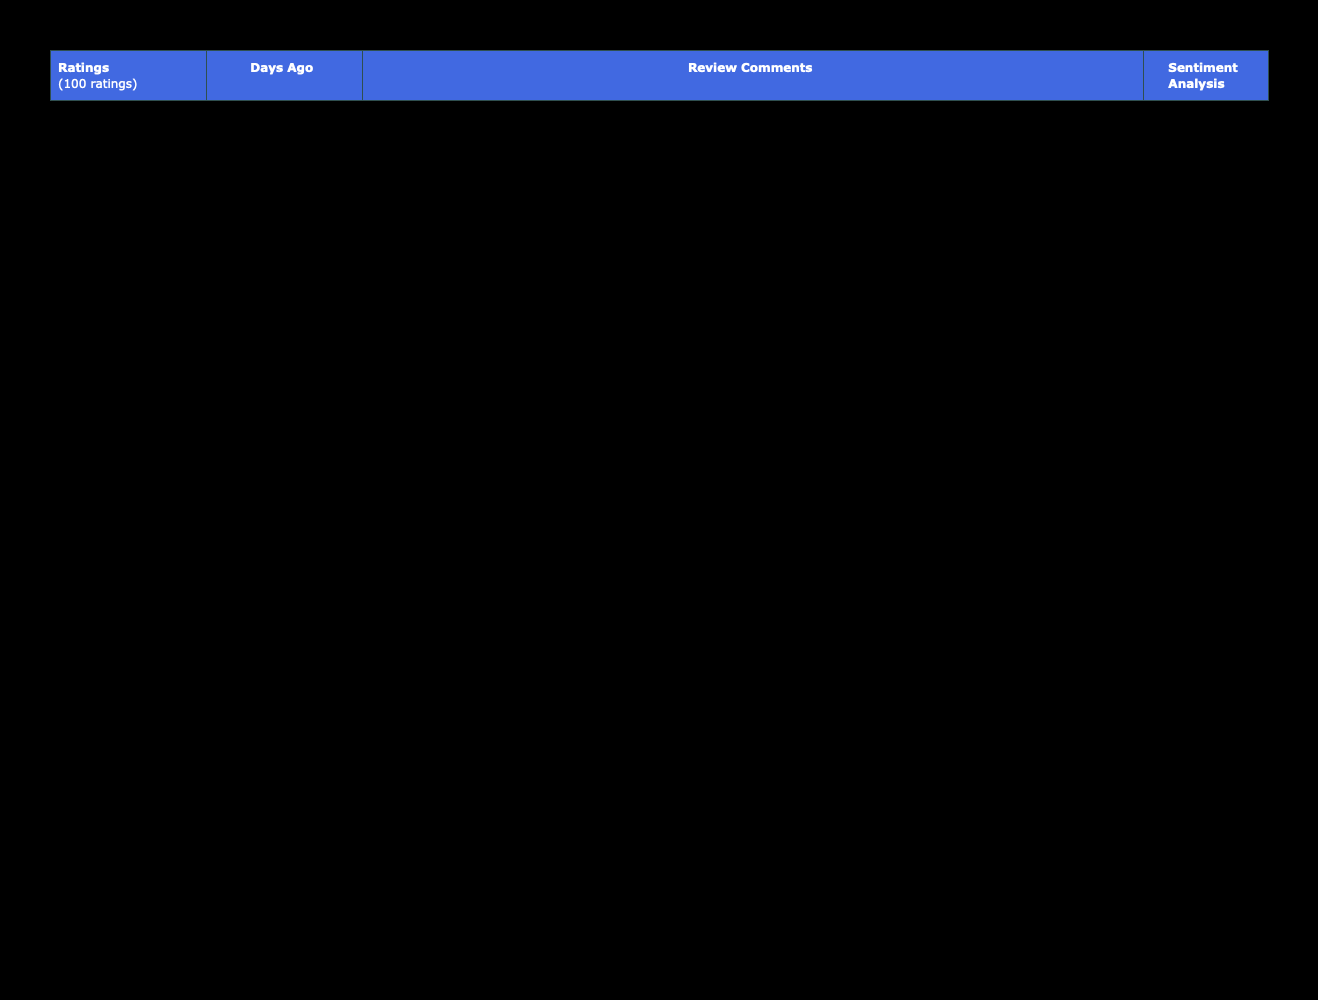

In [30]:
scrape_restaurant()